In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method
import scipy.special as sf
%matplotlib notebook

# Problem 1a

In [2]:
N = 10000
xi = 0
xf = 2
def f(x):
    return 2/((2**2 + x**2)**1.5)

In [3]:
exact = float(0.353553)
x = np.linspace(xi,xf,N)
y = f(x)
fmax = max(y)
xran = xi + (xf-xi)* np.random.random(N)
yran = np.random.random(N)*fmax
below = np.where(yran < f(xran))
above = np.where(yran >= f(xran))


In [4]:
ratio = float(len(below[0])/N)
area= (xf-xi)*fmax
integral = area * ratio
print("the integral of monte carlo is", integral)
print("the exact solution from assignment 2A is", exact)
print("these are extremely close, and the same if taken at the hundredths place ")

the integral of monte carlo is 0.35825
the exact solution from assignment 2A is 0.353553
these are extremely close, and the same if taken at the hundredths place 


# Problem 1b

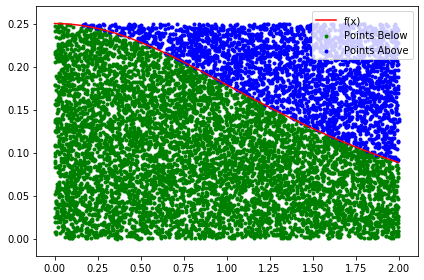

In [5]:
fig = plt.figure('MC Integration')
plt.scatter(xran[below], yran[below], color = "green", marker = '.',label='Points Below')
plt.scatter(xran[above], yran[above], color = "blue", marker = '.', label = 'Points Above')
plt.plot(x, y, color = "red", label= 'f(x)')
plt.legend()
plt.tight_layout()

# Problem 2a 

In [6]:
Time,Nu,Un = np.loadtxt('decay_data.txt', unpack=True)
lt= len(Time)
ln= len(Nu)
un= len(Un)
print(lt,ln,un)

100 100 100


Text(0, 0.5, 'number of particles')

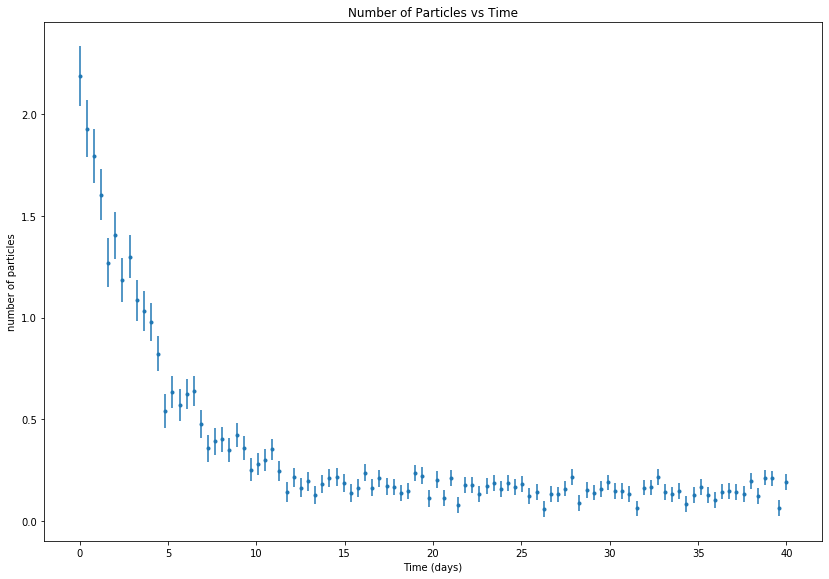

In [7]:
fig = plt.figure()
axes = fig.add_axes([0.2,0.2,1.8,1.8])
axes.set_title('Number of Particles vs Time')
axes.errorbar(Time, Nu, yerr = Un, fmt='.')
axes.set_xlabel('Time (days)')
axes.set_ylabel('number of particles')

# Problem 2b

In [8]:
n = 10000 #steps taken
def fcurve(Time,po,p1,p2):
    return po * e **(-Time/p1) + p2
def get_chi_squared(Time, Nu, Un, params):
    RR = 0.0
    for i in range(len(Time)):
        N_prime = params[0]*np.exp(-Time[i]/params[1]) + params[2]
        RR = RR + ( (Nu[i] - N_prime)/Un[i])**2
    return RR


In [9]:
init_par = np.array([1.0,1.0,1.0])
par_list, RRs = [init_par], [get_chi_squared(Time, Nu, Un, init_par)]
print(par_list[-1])

[1. 1. 1.]


In [10]:
for i in range (n):
    test =[np.random.normal(par_list[-1][0],0.5),np.random.normal(par_list[-1][1],0.5),np.random.normal(par_list[-1][-1],0.5)]
    RR_test = get_chi_squared(Time,Nu,Un,test)
    t = (np.random.random() <= (RRs[-1])/RR_test )

    if t.any():
        par_list.append(test)
        RRs.append(RR_test)
    else:
        par_list.append(par_list[-1])
        RRs.append(RRs[-1])
RR_min= np.amin(RRs)
chisq = RR_min
besti = RRs.index(RR_min)
bestp= par_list[besti]
print("this is the chisq",chisq)
print("this is best po",bestp[0])
print("this is best p1",bestp[1])
print("this is best p2",bestp[2])
print(besti)
np.random.seed(0)

C:\Users\shwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\shwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys


this is the chisq 105.794639431598
this is best po 2.181500103063926
this is best p1 3.5524175225360617
this is best p2 0.15179150579265954
2017


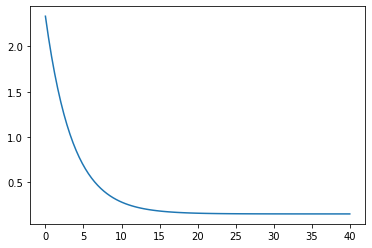

In [11]:
RR_min = np.amin(RRs)
po = bestp[0]
p1 = bestp[1]
p2 = bestp[2]
e= 2.7183
besti = RRs.index(RR_min)
bestp = par_list[besti]
fline= po * e **(-Time/p1) + p2
plt.plot(Time,fline)

this is what graph looks like with p0=p1=p2=1


Text(0, 0.5, 'number of particles')

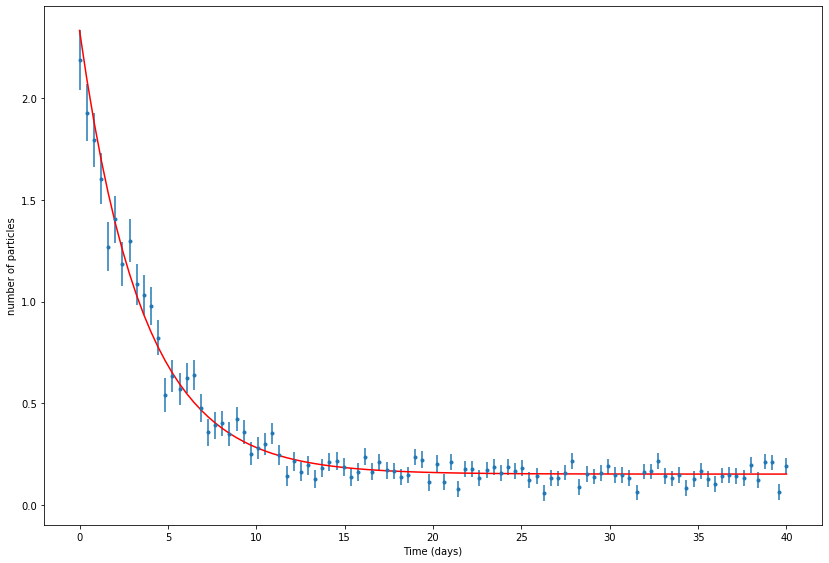

In [12]:
print("this is what graph looks like with p0=p1=p2=1")
fig = plt.figure()
axes = fig.add_axes([0.2,0.2,1.8,1.8])
#axes.set_title('Number of Particles vs Time')
axes.errorbar(Time, Nu, yerr = Un, fmt='.')
axes.plot(Time,(fline),'r')
axes.set_xlabel('Time (days)')
axes.set_ylabel('number of particles')

# Problem 2c

In [13]:
space = len(Time)
dof = space - len(init_par) -1
pvalue = sf.gammaincc(dof/2.0, chisq/2.0)
reduced= chisq/dof
print("this is the reduced chi squared",reduced)
print("this is the pvalue",pvalue)
print("my chisq should be near 1, i have rougly that so my value is a good fit")

this is the reduced chi squared 1.102027494079146
this is the pvalue 0.23211344882196336
my chisq should be near 1, i have rougly that so my value is a good fit


# Problem 2d

this is what graph looks like with p0=p1=p2=1


Text(0, 0.5, 'number of particles')

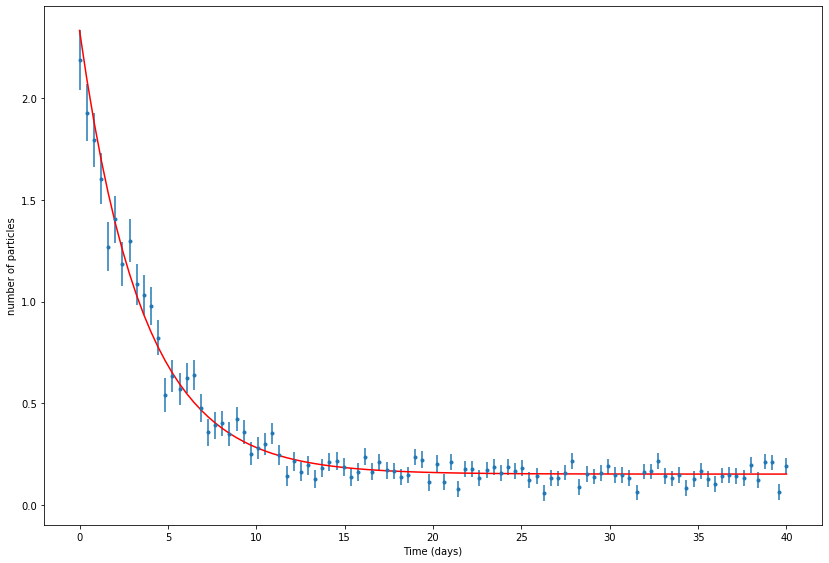

In [14]:
def get_chi_squared(Time, Nu, Un, params):
    RR = 0.0
    for i in range(len(Time)):
        N_prime = params[0]*np.exp(-Time[i]/params[1]) + params[2]
        RR = RR + ( (Nu[i] - N_prime)/Un[i])**2
    return RR
print("this is what graph looks like with p0=p1=p2=1")
fig = plt.figure()
axes = fig.add_axes([0.2,0.2,1.8,1.8])
#axes.set_title('Number of Particles vs Time')
axes.errorbar(Time, Nu, yerr = Un, fmt='.')
axes.plot(Time,(fline),'r')
axes.set_xlabel('Time (days)')
axes.set_ylabel('number of particles')

# Probelm 2e

this is fit for po


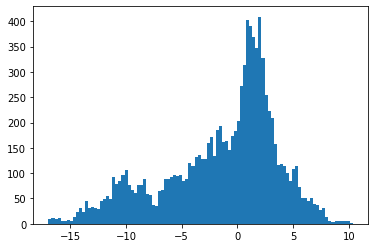

In [15]:
ps = np.array(par_list);
fig1 = plt.figure(1)
plt.figure(1)
plt.hist(ps[:,0], bins=100);
print("this is fit for po")


this is fit for p1


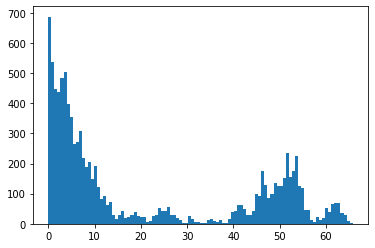

In [16]:
fig2 = plt.figure(2)
plt.figure(2)
plt.hist(ps[:,1], bins=100);
print("this is fit for p1")


this is fit for p2


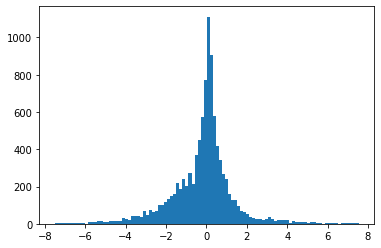

In [17]:
fig2 = plt.figure(3)
plt.figure(3)
plt.hist(ps[:,2], bins=100);
print("this is fit for p2")